<a href="https://colab.research.google.com/github/Dummy-Bug/Quora-Question-Pairs/blob/master/Data%20Preprocessing/2_Quora_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.2.1 : EDA: Advanced Feature Extraction.


In [1]:
! pip install distance
! pip install fuzzywuzzy

     |████████████████████████████████| 180 kB 8.1 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=1684aa15bb41b28ff10f95407e07d0896d6b725c95bf65fcefa8a70b44a7ddc3
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
if os.path.isfile('/content/drive/MyDrive/Quora/df_fe_without_preprocessing_train.csv'):

    df = pd.read_csv("/content/drive/MyDrive/Quora/df_fe_without_preprocessing_train.csv")
    df = df.fillna('')
    df.head()

else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

UnicodeDecodeError: ignored

This problem occur because of some unknown characters in your file. for example. you should remove or replace this characters to solve your problems

### https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c

In [6]:
if os.path.isfile('/content/drive/MyDrive/Quora/df_fe_without_preprocessing_train.csv'):

    df = pd.read_csv("/content/drive/MyDrive/Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()

else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [7]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

https://note.nkmk.me/en/python-str-replace-translate-re-sub/

In [8]:
s = 'one two one two one 10,000,000'

# If you use replace() or translate(), they will be replaced if they completely match the old string.

s = ( s.replace(' ', '-').replace('one','1').replace(',000,000','m') ) 
print(s)

1-two-1-two-1-10m


In [10]:
# In re.sub(), specify a regular expression pattern in the first argument, a new string in the second argument
# and a string to be processed in the third argument.

s = 'one 2000000000 one two one 10000000'

s = re.sub(r"([0-9]+)0000000", r"\1m", s)
print(s)

one 200m one two one 1m


In [11]:
# With help of re.compile('\W') we can remove special characters from the string.

x = 'how many $ amount  spend for Car??'

soup = BeautifulSoup(x)
x    = soup.get_text()
print(x)

pattern = re.compile('\W') # This matches any non-alphanumeric character [^a-zA-Z0-9], it will also match the whitespace.
x       = re.sub(pattern, ' ', x) # removed dollar , question mark and white space then replaced them with white space

print(x) # removed dollar and question mark.

if type(x) == type(''): # if x is of type string.
        x = re.sub(pattern, '*', x) # removed dollar , question mark and white space then replaced them with * sign

print(x)

how many $ amount  spend for Car??
how many   amount  spend for Car  
how*many***amount**spend*for*Car**


In [12]:
x = 'how many $ amount <br> spend for Car??'

soup = BeautifulSoup(x)
x    = soup.get_text()
print(x)

how many $ amount  spend for Car??


In [13]:
# import these modules

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
	print(w, " : ", ps.stem(w))


program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


https://scotch.io/tutorials/an-introduction-to-regex-in-python

In [16]:
STOP_WORDS = stopwords.words("english")


def preprocess(x):

    x = str(x).lower() # first convert x to string then convert string to lower case characters.
    
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")

    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)

    example1 = BeautifulSoup(x) # if we have already removed special symbols then this won't be useful i guess, it should be done before re.compile
    x = example1.get_text()   
    
    pattern = re.compile('\W') 

    if type(x) == type(''): # if x is of type string.
        x = re.sub(pattern, ' ', x) # remove all the special symbols.
    
    porter  = PorterStemmer()

    if type(x) == type(''):
        x = porter.stem(x) # return the stemmed words.
    
    return x
    

- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min length of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max length of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min length of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count(common stop words) to max length of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min length of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max length of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min length of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


https://towardsdatascience.com/fuzzywuzzy-how-to-measure-string-distance-on-python-4e8852d7c18f

In [19]:

def get_token_features(q1, q2):
    
    # To get the results in 4 decimal points
    SAFE_DIV = 0.0001 

    token_features = [0.0]*10
    print("Type of q1 is",type(q1))

    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    # Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)

    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)

    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        # print(strs)
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):

    # preprocessing each question
  
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("...token features...")
    
    # Merging Features with dataset
  
    token_features      = df.apply(lambda x:get_token_features(x["question1"], x["question2"]), axis = 1)

    print(type(get_token_features))
    print(token_features)
    print(token_features.size)
    print(token_features.shape)

    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))

    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   

    
    print("<..fuzzy features..>")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    
    return df


    # Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy

In [21]:
extract_features(df.head(4))  

...token features...
Type of q1 is <class 'str'>
Type of q1 is <class 'str'>
Type of q1 is <class 'str'>
Type of q1 is <class 'str'>
<class 'function'>
0    [0.999980000399992, 0.8333194446759221, 0.9999...
1    [0.7999840003199936, 0.39999600003999963, 0.74...
2    [0.3999920001599968, 0.3333277778703688, 0.399...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 2, 12.0]
dtype: object
4
(4,)
<..fuzzy features..>


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0,1,5,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0,1,4,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2,12.0,28,24,9,14,0.039216


In [22]:
if os.path.isfile('/content/drive/MyDrive/Quora/nlp_features_train.csv'):
    df = pd.read_csv("/content/drive/MyDrive/Quora/nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("/content/drive/MyDrive/Quora/train.csv")
    df = extract_features(df)
    df.to_csv("/content/drive/MyDrive/Quora/nlp_features_train.csv", index=False)
    
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words for duplicate and non duplicate question pairs

In [30]:
df_duplicate     = df[df['is_duplicate'] == 1]
df_nonduplicate = df[df['is_duplicate'] == 0]

df_duplicate.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
5,5,11,12,astrology i am a capricorn sun cap moon and c...,i am a triple capricorn sun moon and ascenda...,1,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,83,77,73,73,0.160920
7,7,15,16,how can i be a good geologist,what should i do to be a great geologist,1,0.499975,0.499975,0.599988,0.428565,0.571420,0.444440,1.0,0.0,2.0,8.0,71,64,61,67,0.354839


https://numpy.org/doc/stable/reference/generated/numpy.dstack.html

In [28]:
a = df_duplicate["question1"]
b = df_duplicate['question2']

without_flattening = np.dstack([a,b]) 
print("Without Flattening\n",without_flattening)

after_flattening = np.dstack([a,b]).flatten()
print("\nAfter Flattening\n",after_flattening)

Without Flattening
 [[['astrology  i am a capricorn sun cap moon and cap rising   what does that say about me '
   'i am a triple capricorn  sun  moon and ascendant in capricorn  what does this say about me ']
  ['how can i be a good geologist '
   'what should i do to be a great geologist ']
  ['how do i read and find my youtube comments '
   'how can i see all my youtube comments ']
  ...
  ['how does a long distance relationship work '
   'how are long distance relationships maintained ']
  ['what does jainism say about homosexuality '
   'what does jainism say about gays and homosexuality ']
  ['do you believe there is life after death '
   'is it true that there is life after death ']]]

After Flattening
 ['astrology  i am a capricorn sun cap moon and cap rising   what does that say about me '
 'i am a triple capricorn  sun  moon and ascendant in capricorn  what does this say about me '
 'how can i be a good geologist ' ...
 'what does jainism say about gays and homosexuality '
 '

In [32]:
# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}

p = np.dstack([ df_duplicate["question1"], df_duplicate["question2"] ]).flatten()
n = np.dstack([df_nonduplicate["question1"], df_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

# Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [33]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()

stopwords = set(STOPWORDS)

stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
# stopwords.remove("best")
# stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193130


__ Word Clouds generated from  duplicate pair question's text __


Word Cloud for Duplicate Question pairs


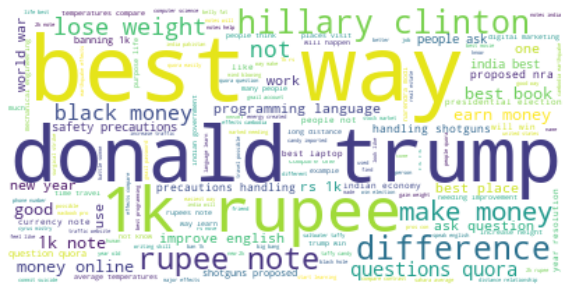

In [35]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)

wc.generate(textp_w)

print ("Word Cloud for Duplicate Question pairs")

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')

plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


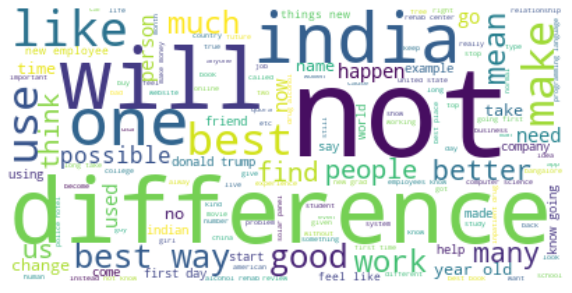

In [36]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)

print ("Word Cloud for non-Duplicate Question pairs:")

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3> conclusion:- </h3>

some wrods occur more often in class == 1 as compared class == 0 and vice versa.

Thus it means simple things like counting how many times a word occurs such as in BOW, tf-Idf features might be useful.

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

In [ ]:
print(df.shape)
print(df.shape[0])

(404290, 21)
404290


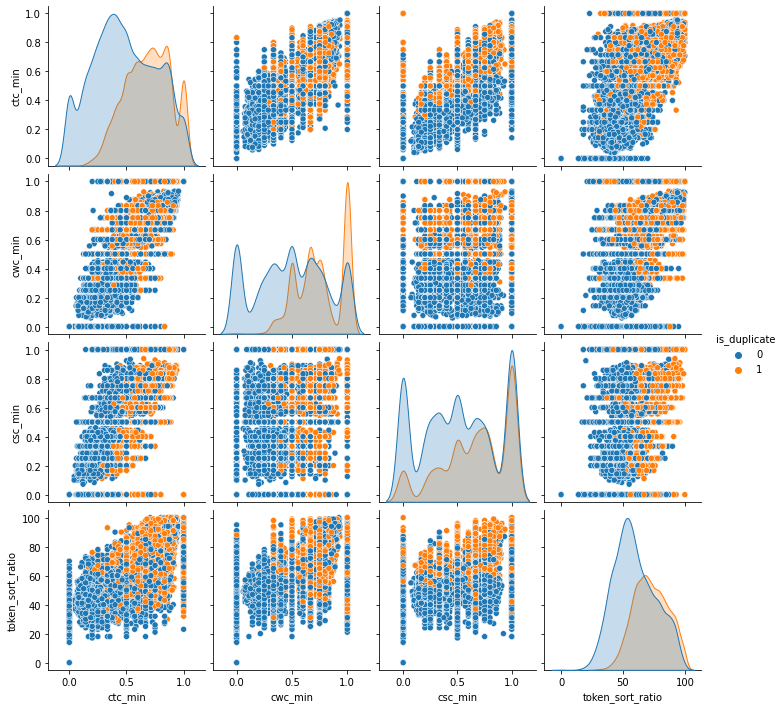

CPU times: user 24.9 s, sys: 2.65 s, total: 27.5 s
Wall time: 24.7 s


In [43]:
%%time
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:20000], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

Token sort ratio is higher for orange points(in aai ipynb).Hence useful feature in Univariate sense

csc_min and ctc_min are also able to distinguish class 1 and class 0 partially. Hence Bivariate analyses can be done.

similarly for csc_min and token ratio too.


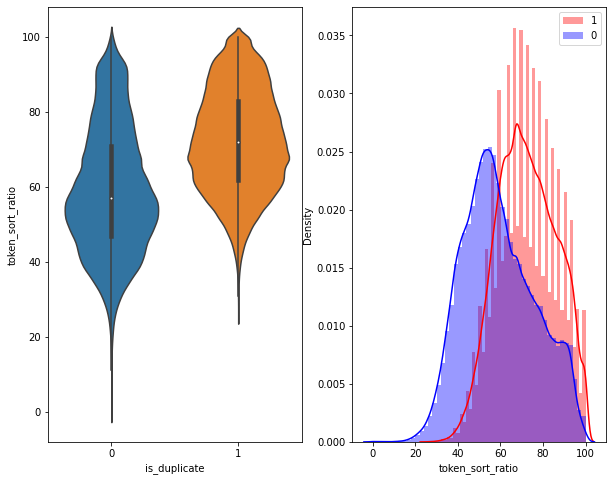

In [41]:
# Distribution of the token_sort_ratio Univariate Analyses
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df )

plt.subplot(1,2,2)

ax = sns.distplot(df[ df['is_duplicate'] == 1.0]['token_sort_ratio'][0:n] , label = "1",  color = 'red')
ax = sns.distplot(df[ df['is_duplicate'] == 0.0]['token_sort_ratio'][0:n] , label = "0" , color = 'blue' )
ax.legend()

plt.show()

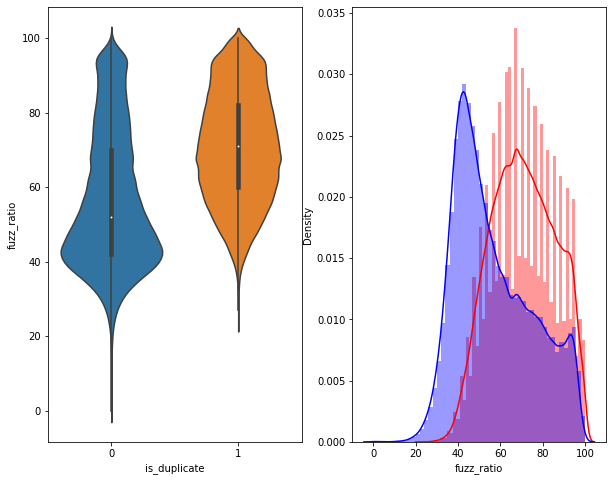

In [45]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)

sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'] , label = "0" , color = 'blue' )

plt.show()

<h3>3.5.2 Visualization </h3>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html

In [52]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

df_subsampled= df[0:5000] # taking only 5k points for the Tsne-visualization

X = MinMaxScaler().fit_transform(df_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])

print(df_subsampled.dtypes)
y = df_subsampled['is_duplicate'].values # performing .values only on one column.
#  A DataFrame with mixed type columns(e.g., str/object, int64, float32)
#  results in an ndarray of the broadest type that accommodates these mixed types (e.g., object).
print(type(y))


id                        int64
qid1                      int64
qid2                      int64
question1                object
question2                object
is_duplicate              int64
cwc_min                 float64
cwc_max                 float64
csc_min                 float64
csc_max                 float64
ctc_min                 float64
ctc_max                 float64
last_word_eq            float64
first_word_eq           float64
abs_len_diff            float64
mean_len                float64
token_set_ratio           int64
token_sort_ratio          int64
fuzz_ratio                int64
fuzz_partial_ratio        int64
longest_substr_ratio    float64
dtype: object
<class 'numpy.ndarray'>


In [53]:
type(df_subsampled['is_duplicate']) # pandas series

pandas.core.series.Series

In [54]:
type(df_subsampled['is_duplicate'].values) # numpy Array

numpy.ndarray

https://towardsdatascience.com/t-sne-python-example-1ded9953f26

In [55]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.009s...
[t-SNE] Computed neighbors for 5000 samples in 0.370s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.259s
[t-SNE] Iteration 50: error = 80.9754486, gradient norm = 0.0432390 (50 iterations in 2.452s)
[t-SNE] Iteration 100: error = 70.4374771, gradient norm = 0.0093234 (50 iterations in 1.807s)
[t-SNE] Iteration 150: error = 68.6510849, gradient norm = 0.0054945 (50 iterations in 1.799s)
[t-SNE] Iteration 200: error = 67.7990570, gradient norm = 0.0052081 (50 iterations in 1.807s)
[t-SNE] Iteration 250: error = 67.3016968, gradient norm = 0.0034786

In [56]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

type(tsne2d)

numpy.ndarray

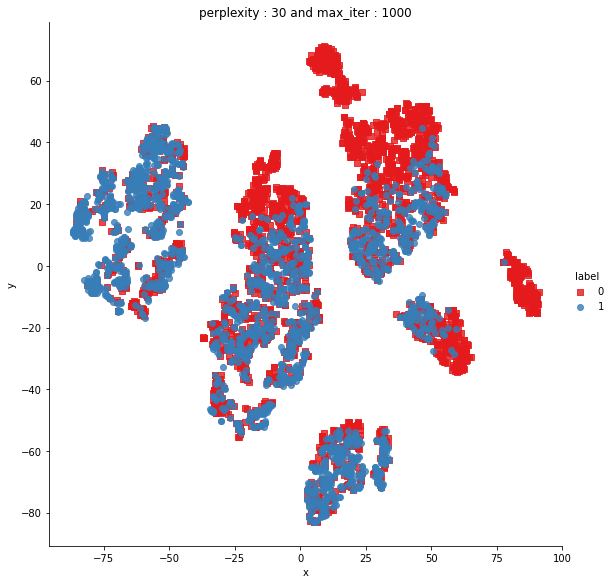

In [57]:
# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

most of the class 0 points are easily separable,ofc there are some overlapping regions too. But there are some separable regions too that means the 15 features that we have designed are good enough to separate the two classes.

In [60]:
%%time

from sklearn.manifold import TSNE

tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.012s...
[t-SNE] Computed neighbors for 5000 samples in 0.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.256s
[t-SNE] Iteration 50: error = 80.3868408, gradient norm = 0.0330533 (50 iterations in 10.336s)
[t-SNE] Iteration 100: error = 69.1344910, gradient norm = 0.0034770 (50 iterations in 5.218s)
[t-SNE] Iteration 150: error = 67.6430664, gradient norm = 0.0017046 (50 iterations in 4.607s)
[t-SNE] Iteration 200: error = 67.0817413, gradient norm = 0.0012463 (50 iterations in 4.573s)
[t-SNE] Iteration 250: error = 66.7552490, gradient norm = 0.000913

In [59]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')